<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [315]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')

In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')

In [0]:
data_train = df_train.values
data_test = df_test.values

Xtrain = data_train[:,1:]
Ytrain = data_train[:,0]

Xtest = data_test[:,1:]
Ytest = data_test[:,0]

In [0]:
# Normalization
Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0)) / Xtest.std(axis=0)

In [0]:
N, D = Xtrain.shape
K = len(set(Ytrain))
M = 128

In [0]:
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  ind=np.zeros((N,K))
  for L in range(N):
    ind[L,Y[L]]=1
  
  return ind

In [0]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

In [0]:
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)

W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

In [0]:
def gradW2(Z, pY, T):
  return Z.T.dot(pY - T)

In [0]:
def gradb2(pY, T):
  return (pY - T).sum(axis = 0)

In [0]:
def gradW1(X, W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return X.T.dot(dZ)

In [0]:
def gradb1(W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return dZ.sum(axis = 0)

In [0]:
def forward(X, W1, b1, W2, b2):
  Z = X.dot(W1) + b1
  Z[Z < 0] = 0				# relu
  
  A = Z.dot(W2) + b2
  expA = np.exp(A)
  pY = expA / expA.sum(axis=1, keepdims=True)
  
  return Z, pY

In [0]:
def cost(pY, Y):
	return -(Y * np.log(pY)).sum()

In [0]:
def error_rate(pY, Y):
  return np.mean(Y != np.argmax(pY, axis=1))

Epoch 1 : cost = 18372.607902897566 error rate = 0.6248
Epoch 1 : cost = 14543.539825390833 error rate = 0.4274
Epoch 1 : cost = 12328.24208618475 error rate = 0.3566
Epoch 1 : cost = 11059.65891512584 error rate = 0.3274
Epoch 1 : cost = 10250.777580184626 error rate = 0.3136
Epoch 1 : cost = 9649.384730215665 error rate = 0.3036
Epoch 1 : cost = 9167.304393969553 error rate = 0.2969
Epoch 1 : cost = 8736.843397944369 error rate = 0.2775
Epoch 1 : cost = 8649.178994033646 error rate = 0.2969
Epoch 1 : cost = 8198.105129732161 error rate = 0.2657
Epoch 1 : cost = 7990.548755468306 error rate = 0.2609
Epoch 1 : cost = 7744.569746330631 error rate = 0.2544
Epoch 1 : cost = 7583.911714864092 error rate = 0.2537
Epoch 1 : cost = 7590.045118569929 error rate = 0.2615
Epoch 1 : cost = 7316.451033973219 error rate = 0.2453
Epoch 1 : cost = 7201.108416599033 error rate = 0.2408
Epoch 1 : cost = 7094.249140793886 error rate = 0.2358
Epoch 1 : cost = 6982.548580125471 error rate = 0.2357
Epoch 1

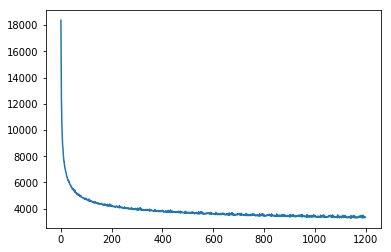

Elapsted time for 10 epoches: 0:02:35.044408


In [331]:
learning_rate = 0.0002
reg = 0.01
training_epochs = 10
batch_sz = 500
n_batches = N // batch_sz
costs = []
t0 = datetime.now()

for epoch in range(training_epochs):
  for j in range(n_batches):
    Xbatch = Xtrain[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    Ybatch = Ytrain_ind[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    
    Z, pY = forward(Xbatch, W1, b1, W2, b2)
    
    W2 -= learning_rate * (gradW2(Z, pY, Ybatch) + reg*W2)
    b2 -= learning_rate * (gradb2(pY, Ybatch) + reg*b2)
    W1 -= learning_rate * (gradW1(Xbatch, W2, Z, pY, Ybatch) + reg*W1)
    b1 -= learning_rate * (gradb1(W2, Z, pY, Ybatch) + reg*b1)
    
    if j % 1 == 0:
      _,pY_test = forward(Xtest, W1, b1, W2, b2)
      c = cost(pY_test, Ytest_ind)
      costs.append(c)
      e = error_rate(pY_test, Ytest)
      print("Epoch", (epoch + 1), ": cost =", c, "error rate =", e)
      
plt.plot(costs, label="cost")
plt.show()

print("Elapsted time for 10 epoches:", datetime.now() - t0)
